* PS3 Question 0\
$-2$ for missing two variables\

## Question 0 - RECS and Replicate Weights 

### Data Files
`2009 RECS microdata files`\
<https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv>\
`2009 replicate weights files`\
<https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv> \
`2015 RECS microdata files`\
<https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv>

### Variables
- `DOEID`: Unique identifier for each sampled household
- `NWEIGHT`: The final sampling weight, accounting for different probabilities of selection and rates of response
- `REGIONC`: Census Region
- `HDD65`: Heating degree days in 2009(2015), base temperature 65 °F
- `CDD65`: Cooling degree days in 2009(2015), base temperature 65 °F
- `brr_weight_*` - balance repeated replicate weights for 2009,
- `BRRWT*` - balance repeated replicate weights for 2015. 

### Weights and Replicate Weights
`The 2009 microdata file to compute estimates and standard errors (RSEs)`\
<https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf>

Standard errors (RSEs) and confidence intervals for survey estimates can be calculated using the **[replicate weights](https://www.eia.gov/consumption/residential/methodology/2009/pdf/using-microdata-022613.pdf)**. RECS uses Fay’s method of the balanced repeated replication (BRR) technique for estimating standard errors. In this method, the replicate weights is applied to repeatedly estimate the statistic of interest and calculate the differences between these estimates and the full-sample estimate.

Suppose $\theta$ is the parameter of interest. The estimate from the full sample for the parameter is $\hat{\theta}$, and the estimate from the r-th replicate subsample by using replicate weights is $\hat{\theta_r}$. The variance of $\hat{\theta}$ is estimated by:
$$
\mathbf{var}(\hat{\theta}) = \frac{1}{R(1-\epsilon)^2}\sum_{r=1}^R(\hat{\theta}-\hat{\theta_r})^2
$$
where $R$ is the number of replicate subsamples and $\epsilon$ is the Fay coefficient, $0\leq\epsilon<1$. The standard error of an estimator is the square root of that estimator’s variance. In this question, $\epsilon = 0.5$ and $R = 244$.

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML

## Question 1 - Data Preparation
### part a)

In [2]:
# load dataset recs for 2019
path = os.getcwd()
if os.path.exists('recs2009_public.csv'):
    recs09 = pd.read_csv('recs2009_public.csv', sep=',', encoding='utf-8')
else:
    url09 = 'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public.csv'
    recs09 = pd.read_csv(url09, sep=',', encoding='utf-8')
    recs09.to_csv('recs2009_public.csv')

# load replicated weights file for 2019
if os.path.exists('recs2009_public_repweights.csv'):
    rep_weights = pd.read_csv('recs2009_public_repweights.csv', sep=',', encoding='utf-8')
else:
    urlweights = 'https://www.eia.gov/consumption/residential/data/2009/csv/recs2009_public_repweights.csv'
    rep_weights = pd.read_csv(urlweights, sep=',', encoding='utf-8')
    rep_weights.to_csv('recs2009_public_repweights.csv')
    
# load dataset recs for 2015
path = os.getcwd()
if os.path.exists('recs2015_public.csv'):
    recs15 = pd.read_csv('recs2015_public.csv', sep=',', encoding='utf-8')
else:
    url15 = 'https://www.eia.gov/consumption/residential/data/2015/csv/recs2015_public_v4.csv'
    recs15 = pd.read_csv(url09, sep=',', encoding='utf-8')
    recs15.to_csv('recs2015_public.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (718,719) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# construct the dataset for 2009
variables = ['DOEID', 'NWEIGHT', 'REGIONC', 'HDD65', 'CDD65']
recs09new = recs09[variables]
recs09new.rename(columns={'DOEID':'id', 'REGIONC':'region', 'NWEIGHT':'w'}, inplace=True)
recs09new.columns = recs09new.columns.str.lower()

recs09new['region'] = pd.Categorical(recs09new['region']
                                     .replace({1: 'Northeast Census Region',
                                               2: 'Midwest Census Region',
                                               3: 'South Census Region',
                                               4: 'West Census Region'}))
# write local copy
recs09new.to_csv("recs2009new.csv")
recs09new.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-4-bca097b20939>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recs09new['region'] = pd.Categorical(recs09new['region']


,id,w,region,hdd65,cdd65
0,1,2471.68,Midwest Census Region,4742,1080
1,2,8599.17,West Census Region,2662,199
2,3,8969.92,Northeast Census Region,6233,505
3,4,18003.64,Midwest Census Region,6034,672
4,5,5999.61,Northeast Census Region,5388,702


In [5]:
# construct the dataset for 2015
recs15new = recs15[variables]
recs15new.rename(columns={'DOEID':'id', 'REGIONC':'region', 'NWEIGHT':'w'}, inplace=True)
recs15new.columns = recs15new.columns.str.lower()

recs15new['region'] = pd.Categorical(recs15new['region']
                                     .replace({1: 'Northeast Census Region',
                                               2: 'Midwest Census Region',
                                               3: 'South Census Region',
                                               4: 'West Census Region'}))

# write the local copy
recs09new.to_csv("recs2015new.csv")
recs15new.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-5-e037344e47f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recs15new['region'] = pd.Categorical(recs15new['region']


,id,w,region,hdd65,cdd65
0,10001,12085.16227,West Census Region,2031,1768
1,10002,14410.19627,South Census Region,1915,2795
2,10003,23325.95385,South Census Region,2263,2235
3,10004,12165.33319,Midwest Census Region,3754,1374
4,10005,16717.67092,Northeast Census Region,5401,993


### part b)

In [7]:
# construct datasets containing just the unique case ids and the replicate weights 
# for 2009
rep_weights09 = rep_weights.iloc[:,rep_weights.columns.str.startswith(("brr", "DOEID"))]
rep_weights09.rename(columns={"DOEID": "id"}, inplace=True)
long_weights09 = pd.melt(rep_weights09, id_vars=['id'], var_name='rep', value_name='rw')

# write the local copy
long_weights09.to_csv("rep_weights2009_long.csv")
long_weights09.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,rep,rw
0,1,brr_weight_1,3628.305158
1,2,brr_weight_1,4408.308000
2,3,brr_weight_1,13664.732100
3,4,brr_weight_1,9456.435434
4,5,brr_weight_1,8659.554041


In [8]:
# construct datasets containing just the unique case ids and the replicate weights 
# for 2015
rep_weights15 = recs15.iloc[:,recs15.columns.str.startswith(("BRR", "DOEID"))]
rep_weights15.rename(columns={"DOEID": "id"}, inplace=True)
long_weights15 = pd.melt(rep_weights15, id_vars=['id'], var_name='rep', value_name='rw')

long_weights15.to_csv("rep_weights2015new.csv")
long_weights15.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,rep,rw
0,10001,BRRWT1,16555.311270
1,10002,BRRWT1,21486.287200
2,10003,BRRWT1,12297.436760
3,10004,BRRWT1,18553.958900
4,10005,BRRWT1,8075.744168


## Question 2 - Construct and report the estimate
### part a)

In [9]:
# calculate the point estimate for 2009
recs09_ave = (
    recs09new
    .groupby('region')
    .apply(lambda x: pd.Series({'ave_hdd65': sum(x.hdd65 * x.w)/x.w.sum(),
                                'ave_cdd65': sum(x.cdd65 * x.w)/x.w.sum()}))
    )

# calculate the variance for 2009
recs09_repl = pd.merge(recs09new, long_weights09, on='id', how='left')
recs09_repl = (
    recs09_repl
    .groupby(['rep','region'])
    .apply(lambda x: pd.Series({'hdd65_rep': sum(x.rw * x.hdd65)/x.rw.sum(),
                                'cdd65_rep': sum(x.rw * x.cdd65)/x.rw.sum()}))
    )

recs09_var = recs09_repl.join(recs09_ave, on = 'region', how = 'inner')
epsilon = 0.5
recs09_var = (
    recs09_var
    .groupby('region')
    .apply(lambda x: pd.Series({'v_hdd65': np.mean((x.hdd65_rep - x.ave_hdd65)**2/(1-epsilon)**2),
                                'v_cdd65': np.mean((x.cdd65_rep - x.ave_cdd65)**2/(1-epsilon)**2)}))
    )

# calculate the confidence interval for 2009
recs09_all = recs09_var.join(recs09_ave, on='region', how='left')

alpha = scipy.stats.norm.ppf(.975, 0, 1)
l = ['hdd65','cdd65']
for k in l:
    recs09_all[''.join(('lwr_',k))] = recs09_all[''.join(('ave_',k))] - alpha*np.sqrt(recs09_all[''.join(('v_',k))])
    recs09_all[''.join(('upr_',k))] = recs09_all[''.join(('ave_',k))] + alpha*np.sqrt(recs09_all[''.join(('v_',k))])

recs09_df = recs09_all.round(3)
recs09_df["ci_hdd65"] = [tuple(recs09_df.iloc[i, 4:6]) for i in range(4)]
recs09_df["ci_cdd65"] = [tuple(recs09_df.iloc[i, 6:8]) for i in range(4)]
recs09_df = recs09_df[['ave_hdd65', 'ave_cdd65', 'ci_hdd65', 'ci_cdd65']]

# create a nicely formatted table
b = recs09_df.transpose()
a1 = np.repeat("2009", 4)
a2 = ['HeatingDays', 'CoolingDays', 'HeatingDays', 'Cooling']
a3 = ['Mean', 'Mean', '95%CI', '95%CI']
b.index = pd.MultiIndex.from_arrays([a1, a2, a3], names=['Year', 'Type', 'Index'])
b = b.sort_index(ascending=False)
display(HTML(b.to_html(index=True)))

In [10]:
# calculate the point estimate for 2015
recs15_ave = (
    recs15new
    .groupby('region')
    .apply(lambda x: pd.Series({'ave_hdd65': sum(x.hdd65*x.w)/x.w.sum(),
                                'ave_cdd65': sum(x.cdd65*x.w)/x.w.sum()}))
    )

# calculate the variance for 2015
recs15_repl = pd.merge(recs15new, long_weights15, on='id', how='left')
recs15_repl = (
    recs15_repl
    .groupby(['rep','region'])
    .apply(lambda x: pd.Series({'hdd65_rep': sum(x.rw*x.hdd65)/x.rw.sum(),
                                'cdd65_rep': sum(x.rw*x.cdd65)/x.rw.sum()}))
    )

recs15_var = recs15_repl.join(recs15_ave, on='region', how='inner')
recs15_var = (
    recs15_var
    .groupby('region')
    .apply(lambda x: pd.Series({'v_hdd65': np.mean((x.hdd65_rep - x.ave_hdd65)**2/(1-epsilon)**2),
                                'v_cdd65': np.mean((x.cdd65_rep - x.ave_cdd65)**2/(1-epsilon)**2)}))
    )

# calculate the confidence interval for 2015
recs15_all = recs15_var.join(recs15_ave, on='region', how='left')
l = ['hdd65','cdd65']
for k in l:
    recs15_all[''.join(('lwr_',k))] = recs15_all[''.join(('ave_',k))] - alpha*np.sqrt(recs15_all[''.join(('v_',k))])
    recs15_all[''.join(('upr_',k))] = recs15_all[''.join(('ave_',k))] + alpha*np.sqrt(recs15_all[''.join(('v_',k))])

recs15_df = recs15_all.round(3)
recs15_df["ci_hdd65"] = [tuple(recs15_df.iloc[i, 4:6]) for i in range(4)]
recs15_df["ci_cdd65"] = [tuple(recs15_df.iloc[i, 6:8]) for i in range(4)]
recs15_df = recs15_df[['ave_hdd65', 'ave_cdd65', 'ci_hdd65', 'ci_cdd65']]

# create a nicely formatted table
b2 = recs15_df.transpose()
a1 = np.repeat("2015", 4)
a2 = ['HeatingDays', 'CoolingDays', 'HeatingDays', 'CoolingDays']
a3 = ['Mean', 'Mean', '95%CI', '95%CI']
b2.index = pd.MultiIndex.from_arrays([a1, a2, a3], names=['Year', 'Type', 'Index'])
b2 = b2.sort_index(ascending=False)
display(HTML(b2.to_html(index=True)))

In [11]:
display(HTML(pd.concat([b, b2]).to_html(index=True)))

### part b)

In [18]:
# calculate the estimation of mean and the confidence interval
dc = {}
vname1 = ['ave_hdd65', 'ave_cdd65']
vname2 = ['v_hdd65', 'v_cdd65']
for v in vname1:
    dc[v] = recs15_all[v] - recs09_all[v]
    
for v in vname2:
    dc[v] = recs15_all[v] + recs09_all[v]


dc = pd.DataFrame.from_dict(dc)
dc['lwr_hdd65'] = dc['ave_hdd65'] - alpha*np.sqrt(dc['v_hdd65'])
dc['upr_hdd65'] = dc['ave_hdd65'] + alpha*np.sqrt(dc['v_hdd65'])
dc['lwr_cdd65'] = dc['ave_cdd65'] - alpha*np.sqrt(dc['v_cdd65'])
dc['upr_cdd65'] = dc['ave_cdd65'] + alpha*np.sqrt(dc['v_cdd65'])

dc_df = dc.round(3)
dc_df["ci_hdd65"] = [tuple(dc_df.iloc[i, 4:6]) for i in range(4)]
dc_df["ci_cdd65"] = [tuple(dc_df.iloc[i, 6:8]) for i in range(4)]
dc_df = dc_df[['ave_hdd65', 'ave_cdd65', 'ci_hdd65', 'ci_cdd65']]

# create a nicely formatted table
b3 = dc_df.transpose()
a1 = ['HeatingDays', 'CoolingDays', 'HeatingDays', 'CoolingDays']
a2 = ['Mean', 'Mean', '95%CI', '95%CI']
b3.index = pd.MultiIndex.from_arrays([a1, a2], names=['Type', 'Index'])
b3 = b3.sort_index(ascending=False)
display(HTML(b3.to_html(index=True)))

## Question 3

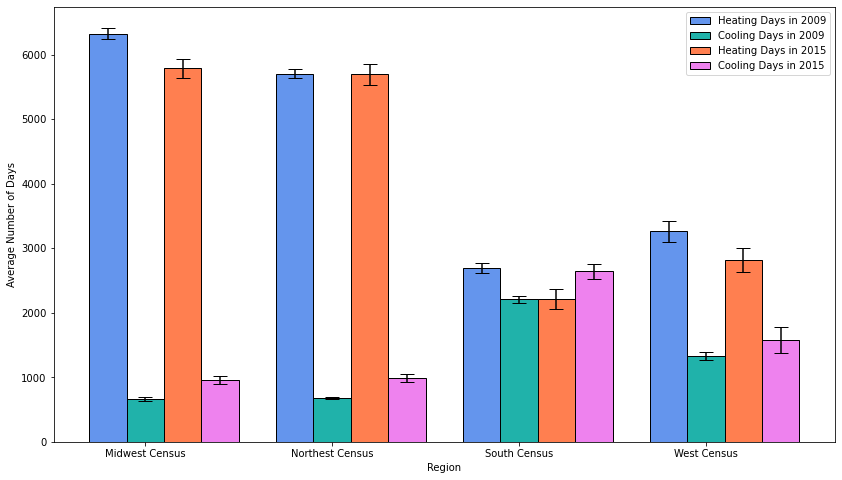

In [13]:
plt.figure(figsize=(14, 8))
# width of the bars
barWidth = 0.2
 
# Choose the height of the bars
bars1 = recs09_all['ave_hdd65']
bars2 = recs09_all['ave_cdd65']
bars3 = recs15_all['ave_hdd65']
bars4 = recs15_all['ave_cdd65']
 
# Choose the height of the error bars (bars1)
yer1 = recs09_all['upr_hdd65'] - recs09_all['ave_hdd65']
yer2 = recs09_all['upr_cdd65'] - recs09_all['ave_cdd65']
yer3 = recs15_all['upr_hdd65'] - recs15_all['ave_hdd65']
yer4 = recs15_all['upr_cdd65'] - recs15_all['ave_cdd65']
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Create bars
plt.bar(r1, bars1, width=barWidth, color='cornflowerblue', edgecolor='black', 
        yerr=yer1, capsize=7, label='Heating Days in 2009')
plt.bar(r2, bars2, width = barWidth, color='lightseagreen', edgecolor='black', 
        yerr=yer2, capsize=7, label='Cooling Days in 2009')
plt.bar(r3, bars3, width = barWidth, color='coral', edgecolor='black', 
        yerr=yer3, capsize=7, label='Heating Days in 2015')
plt.bar(r4, bars4, width=barWidth, color='violet', edgecolor='black', 
        yerr=yer4, capsize=7, label='Cooling Days in 2015')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], 
           ['Midwest Census', 'Northest Census', 'South Census', 'West Census'])
plt.xlabel('Region')
plt.ylabel('Average Number of Days')
plt.legend()
 
# Show graphic
plt.show()

**Figure 1.** The barplots of average estimations for the number of cooling and heating days in the different regions in both 2009 and 2015, with the corresponding 95% confidence interval.

<Figure size 1008x576 with 0 Axes>

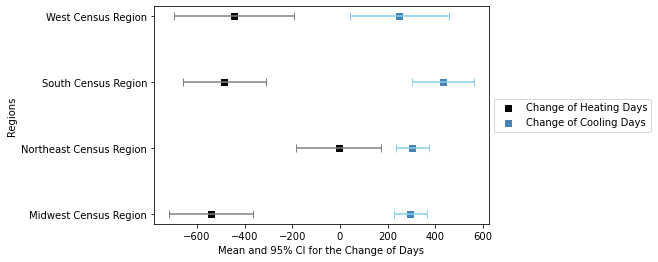

In [14]:
plt.figure(figsize=(14, 8))
fig1, ax1 = plt.subplots(nrows=1, ncols=1)
# heating days
_ = plt.scatter(
    data=dc.reset_index(),
    x='ave_hdd65',
    y='region',
    marker='s',
    color='black',
    label='Change of Heating Days'
    )
_ = plt.errorbar(
    x=dc['ave_hdd65'],
    y=list(dc.index),
    fmt='None',
    xerr=dc['upr_hdd65']-dc['ave_hdd65'],
    ecolor='gray',
    capsize=4
)
# cooling
_ = plt.scatter(
    data=dc.reset_index(),
    x='ave_cdd65',
    y='region',
    marker='s',
    color='steelblue',
    label='Change of Cooling Days'
    )
_ = plt.errorbar(
    x=dc['ave_cdd65'],
    y=list(dc.index),
    fmt='None',
    xerr=dc['upr_cdd65']-dc['ave_cdd65'],
    ecolor='skyblue',
    capsize=4
)
_ = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = ax1.set_xlabel('Mean and 95% CI for the Change of Days')
_ = ax1.set_ylabel('Regions')

**Figure 2.** The average changes for the number of cooling and heating days in the different regions from 2009 to 2015, with the corresponding 95% confidence interval.

Figure 1 shows that there are much more heating days than cooling days in most regions except the south sesus region. In particular, there are around 6 times more heating days in the midwest and northest census region. Figure 2 indicates that the number of heating days is gradually decreasing while the number of cooling days is increasing. 